<font size="5"> Telco Churn </font> <br><br>
Description
In the rapidly evolving telecommunications industry, understanding and mitigating customer churn has become a critical business concern. This data science project aims to analyze customer churn patterns using historical data and build predictive models to identify customers at risk of churning. By doing so, this project aims to provide actionable insights to Telco, enabling them to implement targeted retention strategies.<br><br>
<font size="5"> Goals </font>
<ul>
<li>Data Collection and Preprocessing: Gather and clean Telco customer data to create a comprehensive dataset suitable for analysis.</li>
<li>Exploratory Data Analysis: Perform exploratory analysis to identify trends, patterns, and potential correlations related to customer churn.</li>
<li>Feature Importance Determination: Employ machine learning techniques to assess the importance of various features in predicting churn, aiding in identifying critical factors.</li>
<li>Model Building and Evaluation: Develop predictive models for customer churn, compare their performance, and select the most effective one for accurate churn prediction.</li>
</ul>

<font size="5"> Imports </font>

In [1]:
# Imports of required funcitons
import pandas as pd
import numpy as np
from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns
import os

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import classification_report, confusion_matrix
from prepare import telco_pipeline, telco_prep, telco_modeling, get_telco_data, name_telco, drop_telco, fix_types_telco, fillna_telco, replace_telco, map_telco, reorder_telco

from visuals import plot_churn_distribution, plot_churn_by_internet_service, plot_churn_vs_payment_method, plot_churn_vs_tenure_histogram, plot_churn_vs_monthly_charges_histogram
from explore import chi2_internet_service, chi2_internet_service_type, chi2_payment_method, ttest_churn_vs_tenure, ttest_monthly_charges
from model import get_tree, get_forest, get_logreg, get_knn, get_forest_test

<font size="5">Acquire</font>
<br>
<ul>
<li>Data acquired from Codeup servers.</li>
<li>It contained 7,043 rows and 20 columns before cleaning</li>
<li>Each row represents a customer of Telco.</li>
<li>Each column represents a feature of the customer's account.</li>
</ul>
<br>
<font size="5">Prepare</font> <br>
<br>

* Removed unnecessary columns associated with joining table IDs
* Checked for nulls in the data
    * Replaced new customer's total charges value from blank to 0
    * Replaced internet service type nulls with "No internet service"
* Checked that column data types were appropriate
    * Changed data type of total charges from object to float
* Encoded categorical variables to binary "dummy" variables
    * Removed columns that did not contain useful information (duplicate info)
* Renamed columns to promote readability
* Split data into train, validate and test, stratifying on 'churn'
* Outliers have not been removed for this iteration of the project


<br>
<font size="5">Dictionary</font><br>
<br>

| Feature| Description |
|:-------|:------------|
| Senior Citizen| Whether the customer is a senior citizen (0 for no, 1 for yes)|
| Tenure| Number of months the customer has been with the Telco|
| Monthly Charges| Monthly charges incurred by the customer|
| Total Charges| Total charges incurred by the customer over the entire period|
| Male| Gender of the customer (True for male, False for female)|
| Partner| Whether the customer has a partner (spouse) (True for yes, False for no)|
| Dependents| Whether the customer has dependents (True for yes, False for no)|
| Phone Service| Whether the customer has phone service (True for yes, False for no)|
| Multiple Lines| Whether the customer has multiple phone lines (True for yes, False for no)|
| Online Security| Whether the customer has online security service (True for yes, False for no)|
| Online Backup| Whether the customer has online backup service (True for yes, False for no)|
| Device Protection| Whether the customer has device protection service (True for yes, False for no)|
| Tech Support| Whether the customer has technical support service (True for yes, False for no)|
| Streaming TV| Whether the customer has streaming TV service (True for yes, False for no)|
| Streaming Movies| Whether the customer has streaming movie service (True for yes, False for no)|
| Paperless Billing| Whether the customer has opted for paperless billing (True for yes, False for no)|
| Churn| Whether the customer has churned (True for churned, False for not churned)|
| Contract Month| Whether the customer is on a month-to-month contract (True for yes, False for no)|
| Contract One Year| Whether the customer is on a one-year contract (True for yes, False for no)|
| Contract Two Year| Whether the customer is on a two-year contract (True for yes, False for no)|
| Internet DSL| Whether the customer uses DSL internet service (True for yes, False for no)|
| Internet Fiber Optic| Whether the customer uses fiber optic internet service (True for yes, False for no)|
| Payment Bank Transfer| Whether the customer pays through bank transfer (True for yes, False for no)|
| Payment Credit Card| Whether the customer pays through credit card (True for yes, False for no)|
| Payment Electronic Check| Whether the customer pays through electronic check (True for yes, False for no)|
| Payment Mailed Check| Whether the customer pays through mailed check (True for yes, False for no)|

<font size="5">A brief look at the data</font>

In [2]:
# acquiring, preparing the data
# splitting data into train, validate, and test
df = telco_prep()

# Lets increase the max columns since we have over 20
pd.set_option('display.max_columns', None)
df.head()

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service,internet_service_type,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract,contract_type,payment_method,payment_type,paperless_billing,monthly_charges,total_charges,churn
0,Female,No,Yes,Yes,9,Yes,No,Yes,DSL,No,Yes,No,Yes,Yes,No,Yes,One year,Mailed check,Manual,Yes,65.6,593.30,No
1,Male,No,No,No,9,Yes,Yes,Yes,DSL,No,No,No,No,No,Yes,No,Month-to-month,Mailed check,Manual,No,59.9,542.40,No
2,Male,No,No,No,4,Yes,No,Yes,Fiber optic,No,No,Yes,No,No,No,No,Month-to-month,Electronic check,Manual,Yes,73.9,280.85,Yes
3,Male,Yes,Yes,No,13,Yes,No,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,No,Month-to-month,Electronic check,Manual,Yes,98.0,1237.85,Yes
4,Female,Yes,Yes,No,3,Yes,No,Yes,Fiber optic,No,No,No,Yes,Yes,No,No,Month-to-month,Mailed check,Manual,Yes,83.9,267.40,Yes


In [3]:

# Define the list of selected columns
selected_columns = ['online_security', 'online_backup', 'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies']


In [4]:
df.columns

Index(['gender', 'senior_citizen', 'partner', 'dependents', 'tenure',
       'phone_service', 'multiple_lines', 'internet_service',
       'internet_service_type', 'online_security', 'online_backup',
       'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies',
       'contract', 'contract_type', 'payment_method', 'payment_type',
       'paperless_billing', 'monthly_charges', 'total_charges', 'churn'],
      dtype='object')

In [5]:
unique_columns = ['gender', 'senior_citizen', 'partner', 'dependents',
       'phone_service', 'multiple_lines', 'online_security', 'online_backup',
       'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies',
       'paperless_billing', 'churn',
       'contract_type', 'internet_service_type', 'payment_method']

for column in unique_columns:
    unique_values = df[column].unique()
    print(f"{column}: {unique_values}")

gender: ['Female' 'Male']
senior_citizen: ['No' 'Yes']
partner: ['Yes' 'No']
dependents: ['Yes' 'No']
phone_service: ['Yes' 'No']
multiple_lines: ['No' 'Yes']
online_security: ['No' 'Yes']
online_backup: ['Yes' 'No']
device_protection: ['No' 'Yes']
tech_support: ['Yes' 'No']
streaming_tv: ['Yes' 'No']
streaming_movies: ['No' 'Yes']
paperless_billing: ['Yes' 'No']
churn: ['No' 'Yes']
contract_type: ['One year' 'Month-to-month' 'Two year']
internet_service_type: ['DSL' 'Fiber optic' 'No internet service']
payment_method: ['Mailed check' 'Electronic check' 'Credit card' 'Bank transfer']


In [6]:
csv_filename = 'telco_preped.csv'
df.to_csv(csv_filename, index=False)

<font size="5">A summery of the data</font>

In [7]:
# Print summary of data
print(df.describe())
print()
print(df.shape)

            tenure  monthly_charges  total_charges
count  7043.000000      7043.000000    7043.000000
mean     32.371149        64.761692    2279.734304
std      24.559481        30.090047    2266.794470
min       0.000000        18.250000       0.000000
25%       9.000000        35.500000     398.550000
50%      29.000000        70.350000    1394.550000
75%      55.000000        89.850000    3786.600000
max      72.000000       118.750000    8684.800000

(7043, 23)


<font size="5">Explore</font>

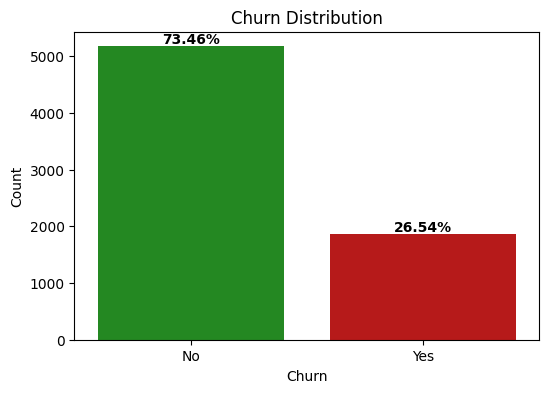

In [8]:
# Display overall churn chart
plot_churn_distribution(df)

<Figure size 600x400 with 0 Axes>

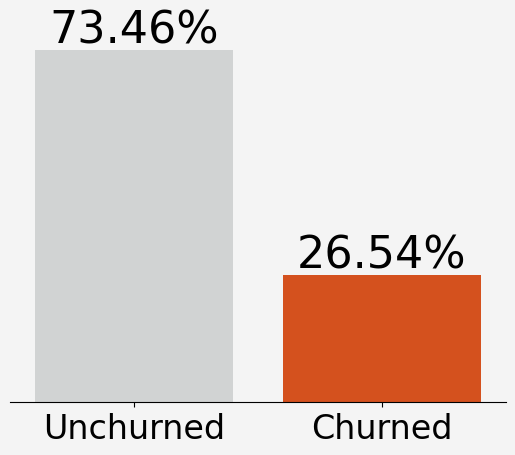

In [9]:
# Set Seaborn style and color palette
sns.set_style(rc = {'axes.facecolor': 'f4f4f4'})

# Filter the data for the specific contract type
filtered_df = df
# Churn Distribution
plt.figure(figsize=(6, 4))
plt.figure().set_facecolor('#f4f4f4')
churn_counts = filtered_df['churn'].value_counts()
total_customers = churn_counts.sum()

# Define custom colors
colors = ['#d0d3d4', '#f24300']

ax = sns.countplot(data=filtered_df, x='churn', palette=colors)
plt.title('')
plt.xlabel('')
plt.ylabel('')

# Adding percentage labels
for i, count in enumerate(churn_counts):
    ax.text(i, count + 100, f'{(count / total_customers) * 100:.2f}%', ha='center', color='black', fontsize=32)

# Adding value count labels at the bottom of each column
#for i, count in enumerate(churn_counts):
#    ax.text(i, 100, f'{count}', ha='center', color='black', fontsize=24)

plt.xticks([0, 1], ['Unchurned', 'Churned'], fontsize=24)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.yaxis.set_visible(False)

plt.show()


In [164]:
filtered_df['contract'].value_counts()

contract
No     3875
Yes    3168
Name: count, dtype: int64

<Figure size 600x400 with 0 Axes>

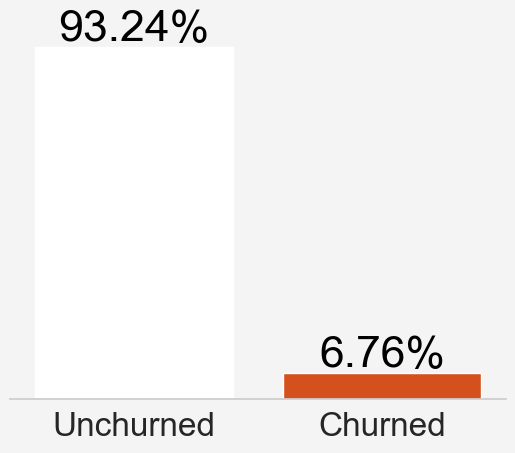

In [349]:

# Filter the data for the specific contract type
filtered_df = df[df['contract'] == 'Yes']

# Set Seaborn style and color palette
sns.set_style(rc = {'axes.facecolor': 'f4f4f4'})

# Churn Distribution
plt.figure(figsize=(6, 4))
plt.figure().set_facecolor('#f4f4f4')
churn_counts = filtered_df['churn'].value_counts()
total_customers = churn_counts.sum()

# Define custom colors
colors = ['#d0d3d4', '#f24300']

ax = sns.countplot(data=filtered_df, x='churn', palette=colors)
plt.title('')
plt.xlabel('')
plt.ylabel('')

# Adding percentage labels
for i, count in enumerate(churn_counts):
    ax.text(i, count + 50, f'{(count / total_customers) * 100:.2f}%', ha='center', color='black', fontsize=32)

# Adding value count labels at the bottom of each column
#for i, count in enumerate(churn_counts):
#    ax.text(i, 50, f'{count}', ha='center', color='black', fontsize=24)

plt.xticks([0, 1], ['Unchurned', 'Churned'], fontsize=24)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.yaxis.set_visible(False)

plt.show()



In [166]:
filtered_df['contract'].value_counts()

contract
Yes    3168
Name: count, dtype: int64

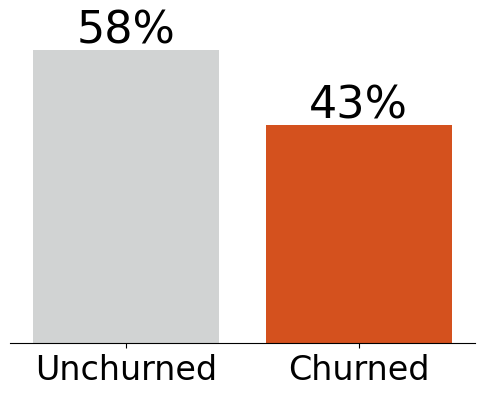

In [11]:
import math

# Filter the data for the specific contract type
filtered_df = df[df['contract'] == 'No']

# Churn Distribution
plt.figure(figsize=(6, 4))
# Set Seaborn style and color palette
sns.set_style(rc = {'axes.facecolor': 'FFFFFF'})
churn_counts = filtered_df['churn'].value_counts()
total_customers = churn_counts.sum()

# Define custom colors
colors = ['#d0d3d4', '#f24300']

ax = sns.countplot(data=filtered_df, x='churn', palette=colors)
plt.title('')
plt.xlabel('')
plt.ylabel('')

# Adding percentage labels
for i, count in enumerate(churn_counts):
    rounded_percentage = math.ceil((count / total_customers) * 100)
    ax.text(i, count + 50, f'{rounded_percentage:.0f}%', ha='center', color='black', fontsize=32)

# Adding value count labels at the bottom of each column
#for i, count in enumerate(churn_counts):
#    ax.text(i, 50, f'{count}', ha='center', color='Black', fontsize=16)

plt.xticks([0, 1], ['Unchurned', 'Churned'], fontsize=24)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.yaxis.set_visible(False)

plt.show()



In [168]:
filtered_df['contract'].value_counts()

contract
No    3875
Name: count, dtype: int64

In [180]:
churn_counts = filtered_df.groupby(['payment_method', 'churn']).size().unstack()
churn_counts

churn,No,Yes
payment_method,,
Bank transfer,388,201
Credit card,365,178
Electronic check,856,994
Mailed check,611,282


In [182]:
churn_counts

churn
No     2220
Yes    1655
Name: count, dtype: int64

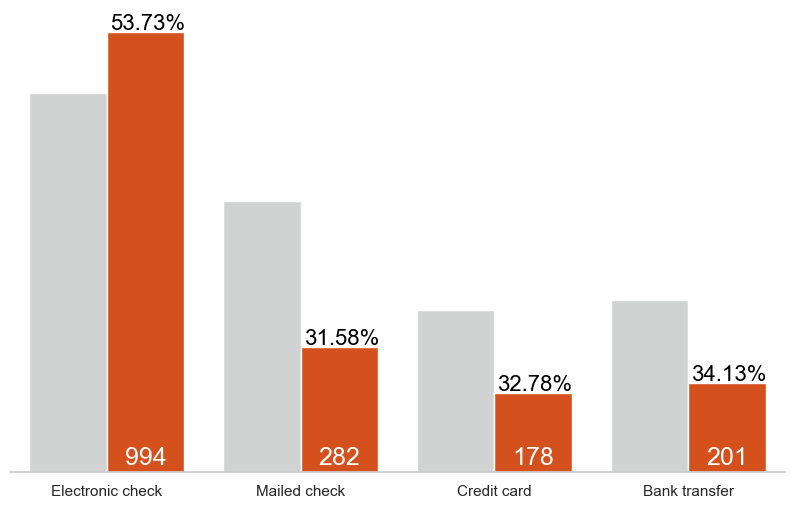

In [329]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter the data for the specific contract type
filtered_df = df[df['contract'] == 'No']

# Churn Distribution
plt.figure(figsize=(10, 6))
desired_order = ['Electronic check', 'Mailed check','Credit card', 'Bank transfer']

ax = sns.countplot(data=filtered_df, x='payment_method', hue='churn', palette=['#d0d3d4', '#f24300'], order= desired_order)
#plt.title('Churn Distribution by Payment Method (Contract: No)')
plt.xlabel('') #'Payment Method'
#plt.ylabel('Count')

# Calculate churn counts for each payment method
churn_counts_dict = {}
for method in desired_order:
    churn_counts = filtered_df[(filtered_df['payment_method'] == method) & (filtered_df['churn'] == 'Yes')].shape[0]
    churn_counts_dict[method] = churn_counts

# Adding value count labels above each column for churn='Yes' bars
for p in ax.patches:
    churn_value = None
    for method, churn_count in churn_counts_dict.items():
        if int(p.get_height()) == churn_count:
            churn_value = 'Yes'
            break
    if churn_value == 'Yes':
        ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., #p.get_height() + 
                                        15),
                    ha='center', color='white', fontsize=18)

# Adding percentage labels
for method in desired_order:
    total_count = filtered_df[filtered_df['payment_method'] == method].shape[0]
    churn_counts = filtered_df[filtered_df['payment_method'] == method]['churn'].value_counts()
    for churn, count in churn_counts.items():
        if churn == 'Yes':
            percentage = (count / total_count) * 100
            height = churn_counts.sum() / 2 if churn == 'No' else churn_counts.sum() + churn_counts['No'] / 2
            ax.text(desired_order.index(method) + .21, count + 5, #(.21 if churn == 'Yes' else -.21)
                    f'{percentage:.2f}%', ha='center', color='black', fontsize=16)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.yaxis.set_visible(False)
#ax.legend(title='Churn', labels=['Unchurned', 'Churned'])
ax.legend_.remove()
plt.show()


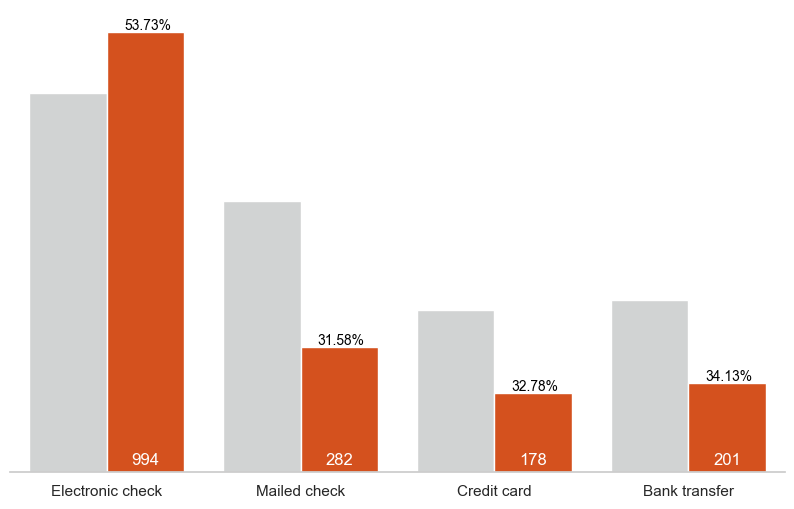

In [318]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter the data for the specific contract type
filtered_df = df[df['contract'] == 'No']

# Churn Distribution
plt.figure(figsize=(10, 6))
desired_order = ['Electronic check', 'Mailed check','Credit card', 'Bank transfer']

ax = sns.countplot(data=filtered_df, x='payment_method', hue='churn', palette=['#d0d3d4', '#f24300'], order= desired_order)
#plt.title('Churn Distribution by Payment Method (Contract: No)')
plt.xlabel('') #'Payment Method'
#plt.ylabel('Count')

# Calculate churn counts for each payment method
churn_counts_dict = {}
for method in desired_order:
    churn_counts = filtered_df[(filtered_df['payment_method'] == method) & (filtered_df['churn'] == 'Yes')].shape[0]
    churn_counts_dict[method] = churn_counts

# Adding value count labels above each column for churn='Yes' bars
for p in ax.patches:
    churn_value = None
    for method, churn_count in churn_counts_dict.items():
        if int(p.get_height()) == churn_count:
            churn_value = 'Yes'
            break
    if churn_value == 'Yes':
        ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., #p.get_height() + 
                                        15),
                    ha='center', color='white', fontsize=12)

# Adding percentage labels
for method in desired_order:
    total_count = filtered_df[filtered_df['payment_method'] == method].shape[0]
    churn_counts = filtered_df[filtered_df['payment_method'] == method]['churn'].value_counts()
    for churn, count in churn_counts.items():
        if churn == 'Yes':
            percentage = (count / total_count) * 100
            height = churn_counts.sum() / 2 if churn == 'No' else churn_counts.sum() + churn_counts['No'] / 2
            ax.text(desired_order.index(method) + .21, count + 5, #(.21 if churn == 'Yes' else -.21)
                    f'{percentage:.2f}%', ha='center', color='black', fontsize=10)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.yaxis.set_visible(False)
#ax.legend(title='Churn', labels=['Unchurned', 'Churned'])
ax.legend_.remove()
plt.show()


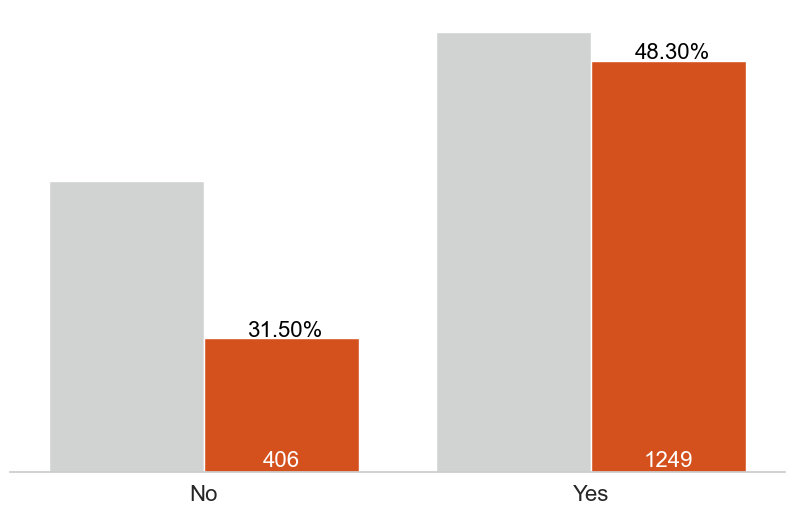

In [341]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter the data for the specific contract type
filtered_df = df[df['contract'] == 'No']

# Churn Distribution
plt.figure(figsize=(10, 6))
desired_order = ['No', 'Yes']  # Unique values in paperless_billing

ax = sns.countplot(data=filtered_df, x='paperless_billing', hue='churn', palette=['#d0d3d4', '#f24300'], order=desired_order)
#plt.title('Churn Distribution by Paperless Billing (Contract: No)')
plt.xlabel('')  # 'Paperless Billing'
#plt.ylabel('Count')

# Calculate churn counts for each paperless_billing value
churn_counts_dict = {}
for value in desired_order:
    churn_counts = filtered_df[(filtered_df['paperless_billing'] == value) & (filtered_df['churn'] == 'Yes')].shape[0]
    churn_counts_dict[value] = churn_counts

# Adding value count labels above each column for churn='Yes' bars
for p in ax.patches:
    churn_value = None
    for value, churn_count in churn_counts_dict.items():
        if int(p.get_height()) == churn_count:
            churn_value = 'Yes'
            break
    if churn_value == 'Yes':
        ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2.,  # p.get_height() +
                                              15),
                ha='center', color='white', fontsize=16)

# Adding percentage labels
for value in desired_order:
    total_count = filtered_df[filtered_df['paperless_billing'] == value].shape[0]
    churn_counts = filtered_df[filtered_df['paperless_billing'] == value]['churn'].value_counts()
    for churn, count in churn_counts.items():
        if churn == 'Yes':
            percentage = (count / total_count) * 100
            height = churn_counts.sum() / 2 if churn == 'No' else churn_counts.sum() + churn_counts['No'] / 2
            ax.text(desired_order.index(value) + .21, count + 5,  # (.21 if churn == 'Yes' else -.21)
                    f'{percentage:.2f}%', ha='center', color='black', fontsize=16)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.yaxis.set_visible(False)
#ax.legend(title='Churn', labels=['Unchurned', 'Churned'])
ax.legend_.remove()
ax.set_xticklabels(ax.get_xticklabels(), fontsize=16)
plt.show()


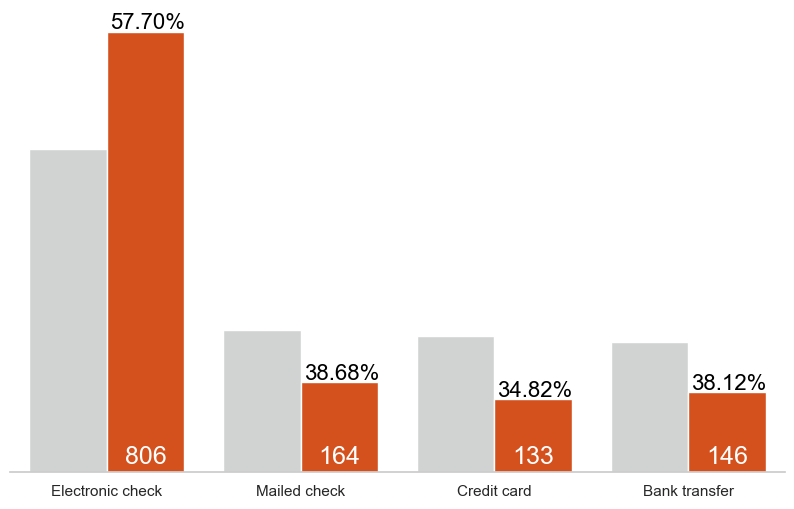

In [330]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter the data for the specific contract type and paperless billing
filtered_df = df[(df['contract'] == 'No') & (df['paperless_billing'] == 'Yes')]

# Churn Distribution
plt.figure(figsize=(10, 6))
desired_order = ['Electronic check', 'Mailed check', 'Credit card', 'Bank transfer']

ax = sns.countplot(data=filtered_df, x='payment_method', hue='churn', hue_order=['No', 'Yes'], palette=['#d0d3d4', '#f24300'], order=desired_order)
#plt.title('Churn Distribution by Payment Method (Contract: No, Paperless Billing: Yes)')
plt.xlabel('') #'Payment Method'
#plt.ylabel('Count')

# Calculate churn counts for each payment method
churn_counts_dict = {}
for method in desired_order:
    churn_counts = filtered_df[(filtered_df['payment_method'] == method) & (filtered_df['churn'] == 'Yes')].shape[0]
    churn_counts_dict[method] = churn_counts

# Adding value count labels above each column for churn='Yes' bars
for p in ax.patches:
    churn_value = None
    for method, churn_count in churn_counts_dict.items():
        if int(p.get_height()) == churn_count:
            churn_value = 'Yes'
            break
    if churn_value == 'Yes':
        ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., #p.get_height() + 
                                        15),
                    ha='center', color='white', fontsize=18)

# Adding percentage labels
for method in desired_order:
    total_count = filtered_df[filtered_df['payment_method'] == method].shape[0]
    churn_counts = filtered_df[filtered_df['payment_method'] == method]['churn'].value_counts()
    for churn, count in churn_counts.items():
        if churn == 'Yes':
            percentage = (count / total_count) * 100
            height = churn_counts.sum() / 2 if churn == 'No' else churn_counts.sum() + churn_counts['No'] / 2
            ax.text(desired_order.index(method) + .21, count + 5, #(.21 if churn == 'Yes' else -.21)
                    f'{percentage:.2f}%', ha='center', color='black', fontsize=16)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.yaxis.set_visible(False)
#ax.legend(title='Churn', labels=['Unchurned', 'Churned'])
ax.legend_.remove()
plt.show()


In [326]:
filtered_df =[]

/var/folders/6c/7ht5b3716k32pz2lmh_pzp8m0000gp/T/ipykernel_33096/2458867903.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['payment_method'] = filtered_df['payment_method'].replace(payment_method_mapping)


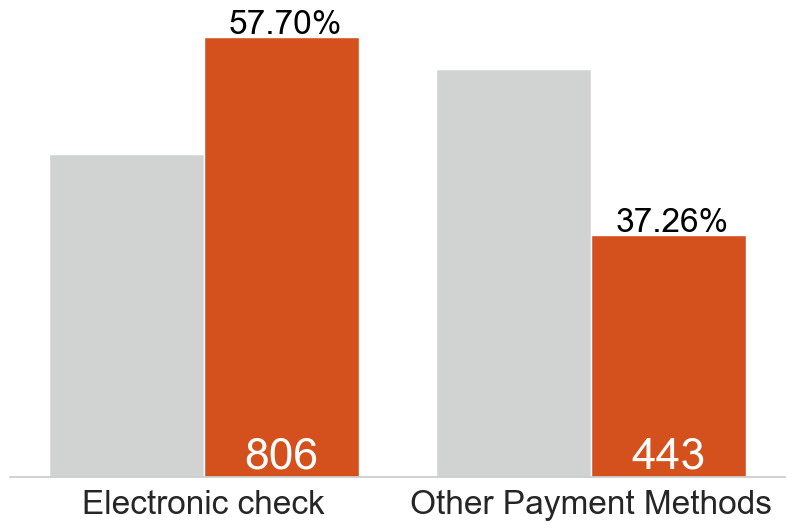

In [343]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter the data for the specific contract type and paperless billing
filtered_df = df[(df['contract'] == 'No') & (df['paperless_billing'] == 'Yes')]

# Update payment method categories in the copied DataFrame
payment_method_mapping = {
    'Mailed check': 'Other Payment Methods',
    'Credit card': 'Other Payment Methods',
    'Bank transfer': 'Other Payment Methods'
}
filtered_df['payment_method'] = filtered_df['payment_method'].replace(payment_method_mapping)

# Churn Distribution
plt.figure(figsize=(10, 6))
desired_order = ['Electronic check', 'Other Payment Methods']

ax = sns.countplot(data=filtered_df, x='payment_method', hue='churn', hue_order=['No', 'Yes'], palette=['#d0d3d4', '#f24300'], order=desired_order)
#plt.title('Churn Distribution by Payment Method (Contract: No, Paperless Billing: Yes)')
plt.xlabel('') #'Payment Method'
#plt.ylabel('Count')

# Calculate churn counts for each payment method
churn_counts_dict = {}
for method in desired_order:
    churn_counts = filtered_df[(filtered_df['payment_method'] == method) & (filtered_df['churn'] == 'Yes')].shape[0]
    churn_counts_dict[method] = churn_counts

# Adding value count labels above each column for churn='Yes' bars
for p in ax.patches:
    churn_value = None
    for method, churn_count in churn_counts_dict.items():
        if int(p.get_height()) == churn_count:
            churn_value = 'Yes'
            break
    if churn_value == 'Yes':
        ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., #p.get_height() + 
                                        15),
                    ha='center', color='white', fontsize=32)

# Adding percentage labels
for method in desired_order:
    total_count = filtered_df[filtered_df['payment_method'] == method].shape[0]
    churn_counts = filtered_df[filtered_df['payment_method'] == method]['churn'].value_counts()
    for churn, count in churn_counts.items():
        if churn == 'Yes':
            percentage = (count / total_count) * 100
            height = churn_counts.sum() / 2 if churn == 'No' else churn_counts.sum() + churn_counts['No'] / 2
            ax.text(desired_order.index(method) + .21, count + 5, #(.21 if churn == 'Yes' else -.21)
                    f'{percentage:.2f}%', ha='center', color='black', fontsize=24)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.yaxis.set_visible(False)
#ax.legend(title='Churn', labels=['Unchurned', 'Churned'])
ax.legend_.remove()
ax.set_xticklabels(ax.get_xticklabels(), fontsize=24)
plt.show()


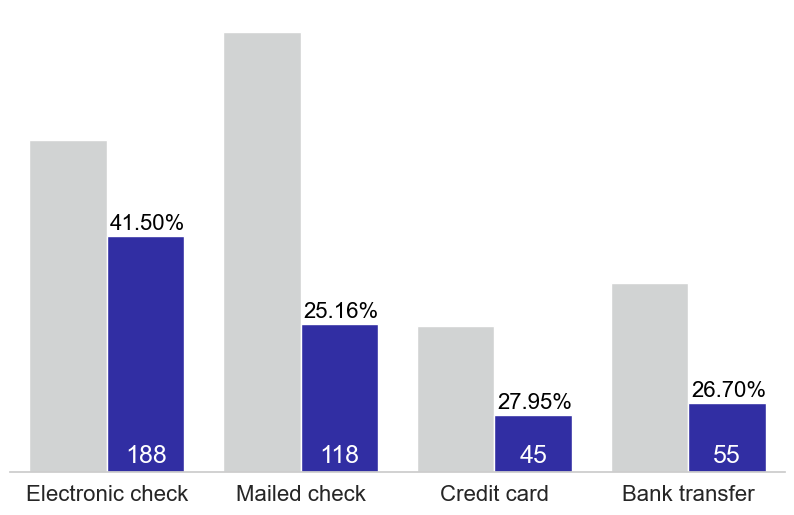

In [338]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter the data for the specific contract type and paperless billing
filtered_df = df[(df['contract'] == 'No') & (df['paperless_billing'] == 'No')]

# Churn Distribution
plt.figure(figsize=(10, 6))
desired_order = ['Electronic check', 'Mailed check', 'Credit card', 'Bank transfer']

ax = sns.countplot(data=filtered_df, x='payment_method', hue='churn', hue_order=['No', 'Yes'], palette=['#d0d3d4', '#1e1ab6'], order=desired_order)
#plt.title('Churn Distribution by Payment Method (Contract: No, Paperless Billing: Yes)')
plt.xlabel('') #'Payment Method'
#plt.ylabel('Count')

# Calculate churn counts for each payment method
churn_counts_dict = {}
for method in desired_order:
    churn_counts = filtered_df[(filtered_df['payment_method'] == method) & (filtered_df['churn'] == 'Yes')].shape[0]
    churn_counts_dict[method] = churn_counts

# Adding value count labels above each column for churn='Yes' bars
for p in ax.patches:
    churn_value = None
    for method, churn_count in churn_counts_dict.items():
        if int(p.get_height()) == churn_count:
            churn_value = 'Yes'
            break
    if churn_value == 'Yes':
        ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., #p.get_height() + 
                                        7),
                    ha='center', color='white', fontsize=18)

# Adding percentage labels
for method in desired_order:
    total_count = filtered_df[filtered_df['payment_method'] == method].shape[0]
    churn_counts = filtered_df[filtered_df['payment_method'] == method]['churn'].value_counts()
    for churn, count in churn_counts.items():
        if churn == 'Yes':
            percentage = (count / total_count) * 100
            height = churn_counts.sum() / 2 if churn == 'No' else churn_counts.sum() + churn_counts['No'] / 2
            ax.text(desired_order.index(method) + .21, count + 5, #(.21 if churn == 'Yes' else -.21)
                    f'{percentage:.2f}%', ha='center', color='black', fontsize=16)


ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.yaxis.set_visible(False)
#ax.legend(title='Churn', labels=['Unchurned', 'Churned'])
ax.legend_.remove()
ax.set_xticklabels(ax.get_xticklabels(), fontsize=16)
plt.show()


/var/folders/6c/7ht5b3716k32pz2lmh_pzp8m0000gp/T/ipykernel_33096/286596552.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['payment_method'] = filtered_df['payment_method'].replace(payment_method_mapping)


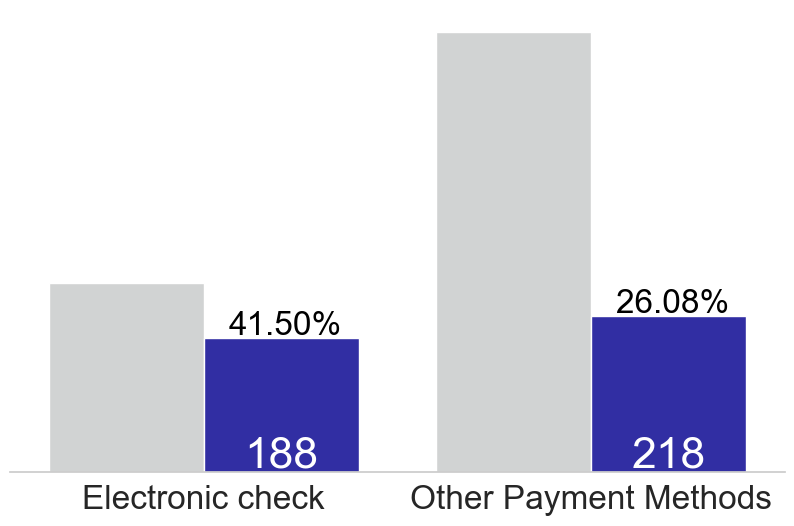

In [344]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter the data for the specific contract type and paperless billing
filtered_df = df[(df['contract'] == 'No') & (df['paperless_billing'] == 'No')]

# Update payment method categories in the copied DataFrame
payment_method_mapping = {
    'Mailed check': 'Other Payment Methods',
    'Credit card': 'Other Payment Methods',
    'Bank transfer': 'Other Payment Methods'
}
filtered_df['payment_method'] = filtered_df['payment_method'].replace(payment_method_mapping)

# Churn Distribution
plt.figure(figsize=(10, 6))
desired_order = ['Electronic check', 'Other Payment Methods']

sns.set_palette(palette.values())  # Set the palette

ax = sns.countplot(data=filtered_df, x='payment_method', hue='churn', hue_order=['No', 'Yes'], palette=['#d0d3d4', '#1e1ab6'], order=desired_order)
#plt.title('Churn Distribution by Payment Method (Contract: No, Paperless Billing: Yes)')
plt.xlabel('') #'Payment Method'
#plt.ylabel('Count')

# Calculate churn counts for each payment method
churn_counts_dict = {}
for method in desired_order:
    churn_counts = filtered_df[(filtered_df['payment_method'] == method) & (filtered_df['churn'] == 'Yes')].shape[0]
    churn_counts_dict[method] = churn_counts

# Adding value count labels above each column for churn='Yes' bars
for p in ax.patches:
    churn_value = None
    for method, churn_count in churn_counts_dict.items():
        if int(p.get_height()) == churn_count:
            churn_value = 'Yes'
            break
    if churn_value == 'Yes':
        ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., #p.get_height() + 
                                        7),
                    ha='center', color='white', fontsize=32)

# Adding percentage labels
for method in desired_order:
    total_count = filtered_df[filtered_df['payment_method'] == method].shape[0]
    churn_counts = filtered_df[filtered_df['payment_method'] == method]['churn'].value_counts()
    for churn, count in churn_counts.items():
        if churn == 'Yes':
            percentage = (count / total_count) * 100
            height = churn_counts.sum() / 2 if churn == 'No' else churn_counts.sum() + churn_counts['No'] / 2
            ax.text(desired_order.index(method) + .21, count + 5, #(.21 if churn == 'Yes' else -.21)
                    f'{percentage:.2f}%', ha='center', color='black', fontsize=24)


ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.yaxis.set_visible(False)
#ax.legend(title='Churn', labels=['Unchurned', 'Churned'])
ax.legend_.remove()
ax.set_xticklabels(ax.get_xticklabels(), fontsize=24)
plt.show()


In [308]:
filtered_df['payment_method'].unique().tolist().index(method)

2

<font size="4">36% of our customers have churned.</font>

<font size="5">Does Internet Type Affect Churn?</font>

We will compare the churn rates across different internet service types.

Internet type contains three unique values: 'DSL', 'Fiber optic', and 'No internet service'.

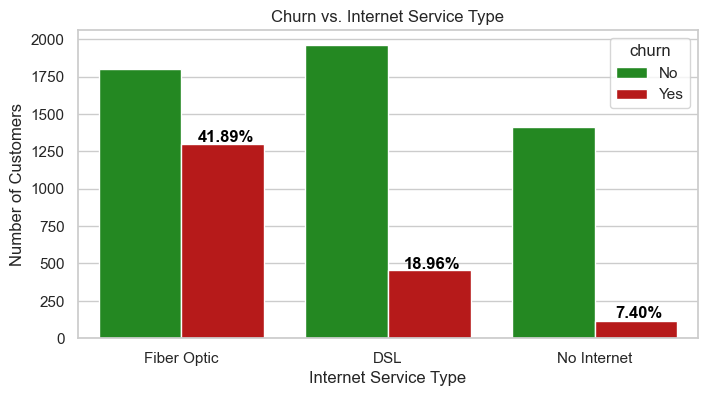

In [25]:
# Display churn rates by internet service type
plot_churn_by_internet_service(df)

In [26]:
df[['online_security', 'online_backup', 'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies']]

,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies
0,No,Yes,No,Yes,Yes,No
1,No,No,No,No,No,Yes
2,No,No,Yes,No,No,No
3,No,Yes,Yes,No,Yes,Yes
4,No,No,No,Yes,Yes,No
...,...,...,...,...,...,...
7038,Yes,No,No,Yes,No,No
7039,No,No,No,No,No,Yes
7040,No,Yes,No,No,No,No
7041,Yes,No,Yes,Yes,No,Yes


In [27]:
unique_columns = ['gender', 'senior_citizen', 'partner', 'dependents',
                 'phone_service', 'multiple_lines', 'internet_service',
                 'internet_service_type', 'online_security', 'online_backup',
                 'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies',
                 'contract', 'contract_type', 'payment_method', 'payment_type',
                 'paperless_billing', 'churn']

for column in unique_columns:
    unique_values = df[column].unique()
    print(f"{column}: {unique_values}")


gender: ['Female' 'Male']
senior_citizen: ['No' 'Yes']
partner: ['Yes' 'No']
dependents: ['Yes' 'No']
phone_service: ['Yes' 'No']
multiple_lines: ['No' 'Yes']
internet_service: ['Yes' 'No']
internet_service_type: ['DSL' 'Fiber optic' 'No internet service']
online_security: ['No' 'Yes']
online_backup: ['Yes' 'No']
device_protection: ['No' 'Yes']
tech_support: ['Yes' 'No']
streaming_tv: ['Yes' 'No']
streaming_movies: ['No' 'Yes']
contract: ['Yes' 'No']
contract_type: ['One year' 'Month-to-month' 'Two year']
payment_method: ['Mailed check' 'Electronic check' 'Credit card' 'Bank transfer']
payment_type: ['Manual' 'Automatic']
paperless_billing: ['Yes' 'No']
churn: ['No' 'Yes']


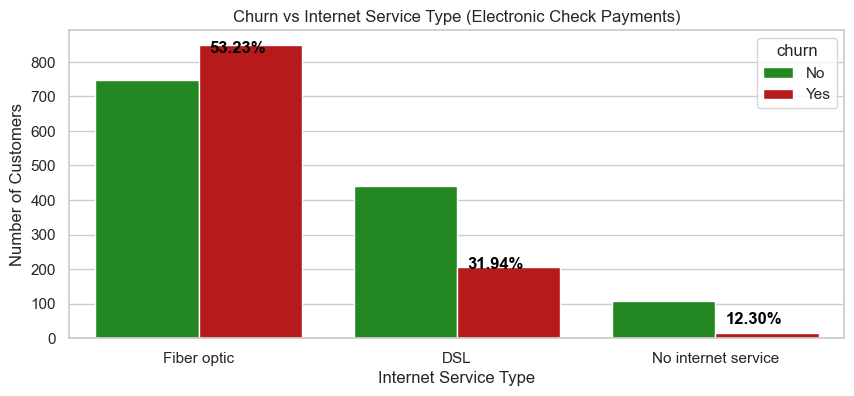

In [28]:
def plot_churn_vs_internet_service_echeck(df):
    # Filter the DataFrame for customers paying with electronic check
    df_electronic_check = df[df['payment_method'] == 'Electronic check']
    
    # Calculate churn ratios for internet service types
    churn_ratio_dsl = (df_electronic_check[df_electronic_check['internet_service_type'] == 'DSL']['churn'].value_counts()['Yes'] /
                       (df_electronic_check[df_electronic_check['internet_service_type'] == 'DSL']['churn'].value_counts()['Yes'] +
                        df_electronic_check[df_electronic_check['internet_service_type'] == 'DSL']['churn'].value_counts()['No'])) * 100
    
    churn_ratio_fiber_optic = (df_electronic_check[df_electronic_check['internet_service_type'] == 'Fiber optic']['churn'].value_counts()['Yes'] /
                               (df_electronic_check[df_electronic_check['internet_service_type'] == 'Fiber optic']['churn'].value_counts()['Yes'] +
                                df_electronic_check[df_electronic_check['internet_service_type'] == 'Fiber optic']['churn'].value_counts()['No'])) * 100
    
    churn_ratio_no_internet = (df_electronic_check[df_electronic_check['internet_service_type'] == 'No internet service']['churn'].value_counts()['Yes'] /
                               (df_electronic_check[df_electronic_check['internet_service_type'] == 'No internet service']['churn'].value_counts()['Yes'] +
                                df_electronic_check[df_electronic_check['internet_service_type'] == 'No internet service']['churn'].value_counts()['No'])) * 100
    
    # Chart settings
    sns.set(style="whitegrid")
    plt.figure(figsize=(10, 4))
    
    # Reordered hue categories
    hue_order = ['No', 'Yes']

    # Create a bar plot for internet service types and churn rates
    ax = sns.countplot(x='internet_service_type', hue='churn', data=df_electronic_check,
                       palette=["#149911", "#D00000"],
                       order=['Fiber optic', 'DSL', 'No internet service'], hue_order=hue_order)

    plt.title("Churn vs Internet Service Type (Electronic Check Payments)")
    plt.xlabel("Internet Service Type")
    plt.ylabel("Number of Customers")

    # Annotate the churned columns with the churn ratio
    ax.annotate(f"{churn_ratio_fiber_optic:.2f}%", xy=(0, churn_ratio_fiber_optic), xytext=(28, 190),
                textcoords="offset points", ha='center', va='bottom', color='black', weight='bold')

    ax.annotate(f"{churn_ratio_dsl:.2f}%", xy=(1, churn_ratio_dsl), xytext=(28, 40),
                textcoords="offset points", ha='center', va='bottom', color='black', weight='bold')

    ax.annotate(f"{churn_ratio_no_internet:.2f}%", xy=(2, churn_ratio_no_internet), xytext=(28, 5),
                textcoords="offset points", ha='center', va='bottom', color='black', weight='bold')

    plt.show()

# Call the function with the provided DataFrame
plot_churn_vs_internet_service_echeck(df)


<font size="4">Churn ratio percentage is 15% higher on customers with Fiber Optic service.</font>

<font size="5">Hypothesis</font>

Null Hypothesis (H<sub>0</sub>): The type of internet service does not have any significant effect on customer churn.<br>
Alternative Hypothesis (H<sub>a</sub>): The type of internet service has a significant effect on customer churn.

We use a chi-squared test for independence to examine the relationship between Churn and Internet Service.

Chi-Square Test
* Confidance interval of 95%
* Alpha .05

In [29]:
# Perform Chi-Test
chi2_internet_service_type(df)

Chi-Squared Value: 732.309589667794
P-value: 0.0000


<font size="5">We have strong evidence to reject the null hypothesis</font>

P value is near 0. Therefore we have evidende so support that churn and internet type are related. Based on this and the large difference in distribution, using internet service featrue in modeling will likely have a large positive impact on the model's accuracy. 

<font size="5">Does payment method have an affect on churn?</font>

We will compare the churn rates across different Payment Methods.

Payment Methods contains four unique values: 'Electronic Check', 'Mail Check', 'Credit Card' and 'Bank Transfer'.

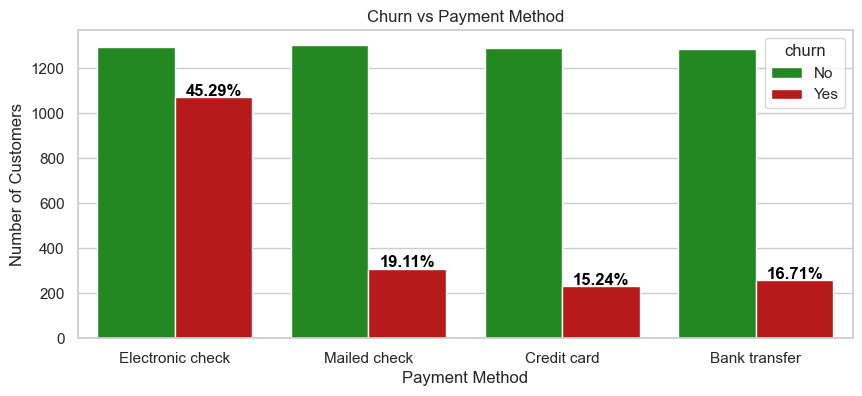

In [30]:
#Display churn vs payment method
plot_churn_vs_payment_method(df)

NameError: name 'p' is not defined

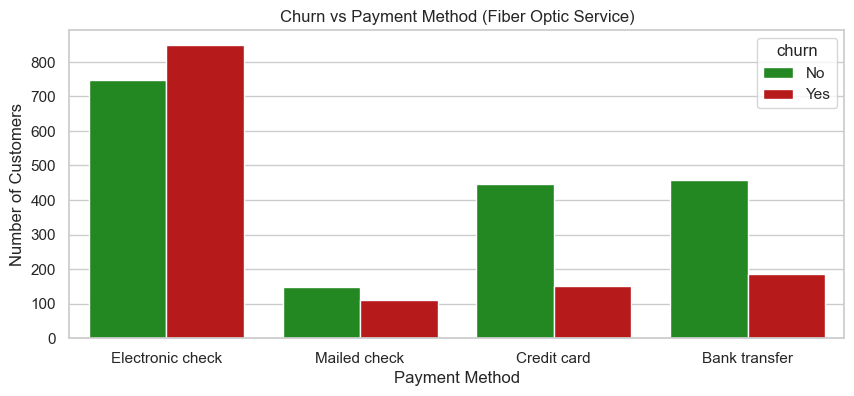

In [52]:
def plot_churn_vs_payment_method_fiber(df):
    # Filter the DataFrame for customers with fiber optic service
    df_fiber = df[df['internet_service_type'] == 'Fiber optic']
    
    # Calculate churn ratios for payment methods
    churn_ratio_electronic_check = (df_fiber[df_fiber['payment_method'] == 'Electronic check']['churn'].value_counts()['Yes'] /
                                    (df_fiber[df_fiber['payment_method'] == 'Electronic check']['churn'].value_counts()['Yes'] +
                                     df_fiber[df_fiber['payment_method'] == 'Electronic check']['churn'].value_counts()['No'])) * 100
    
    churn_ratio_mailed_check = (df_fiber[df_fiber['payment_method'] == 'Mailed check']['churn'].value_counts()['Yes'] /
                                 (df_fiber[df_fiber['payment_method'] == 'Mailed check']['churn'].value_counts()['Yes'] +
                                  df_fiber[df_fiber['payment_method'] == 'Mailed check']['churn'].value_counts()['No'])) * 100
    
    churn_ratio_credit_card = (df_fiber[df_fiber['payment_method'] == 'Credit card']['churn'].value_counts()['Yes'] /
                               (df_fiber[df_fiber['payment_method'] == 'Credit card']['churn'].value_counts()['Yes'] +
                                df_fiber[df_fiber['payment_method'] == 'Credit card']['churn'].value_counts()['No'])) * 100
    
    churn_ratio_bank_transfer = (df_fiber[df_fiber['payment_method'] == 'Bank transfer']['churn'].value_counts()['Yes'] /
                                 (df_fiber[df_fiber['payment_method'] == 'Bank transfer']['churn'].value_counts()['Yes'] +
                                  df_fiber[df_fiber['payment_method'] == 'Bank transfer']['churn'].value_counts()['No'])) * 100
    
    # Chart settings
    sns.set(style="whitegrid")
    plt.figure(figsize=(10, 4))

    # Create a bar plot for payment methods and churn rates
    ax = sns.countplot(x='payment_method', hue='churn', data=df_fiber, palette=["#149911", "#D00000"], order=['Electronic check', 'Mailed check', 'Credit card', 'Bank transfer'], hue_order=['No', 'Yes'])

    plt.title("Churn vs Payment Method (Fiber Optic Service)")
    plt.xlabel("Payment Method")
    plt.ylabel("Number of Customers")

    # Move the legend outside the plot
    #ax.legend(title="Churn", loc='upper right', bbox_to_anchor=(1.25, 1))

    # Annotate the churned columns with the churn ratio
    ax.annotate(f"{churn_ratio_electronic_check:.2f}%", xy=(p.get_x() + p.get_width() / 2, p.get_height()), 
                xytext=(0, 0), textcoords="offset points", ha='center', va='bottom', color='black', weight='bold')
    

    ax.annotate(f"{churn_ratio_mailed_check:.2f}%", xy=(p.get_x() + p.get_width() / 2, p.get_height()), 
                xytext=(0, 0), textcoords="offset points", ha='center', va='bottom', color='black', weight='bold')

    ax.annotate(f"{churn_ratio_credit_card:.2f}%", xy=(p.get_x() + p.get_width() / 2, p.get_height()), 
                xytext=(0, 0), textcoords="offset points", ha='center', va='bottom', color='black', weight='bold')

    ax.annotate(f"{churn_ratio_bank_transfer:.2f}%", xy=(p.get_x() + p.get_width() / 2, p.get_height()), 
                xytext=(0, 0), textcoords="offset points", ha='center', va='bottom', color='black', weight='bold')

    plt.show()

# Call the function with the provided DataFrame
plot_churn_vs_payment_method_fiber(df)


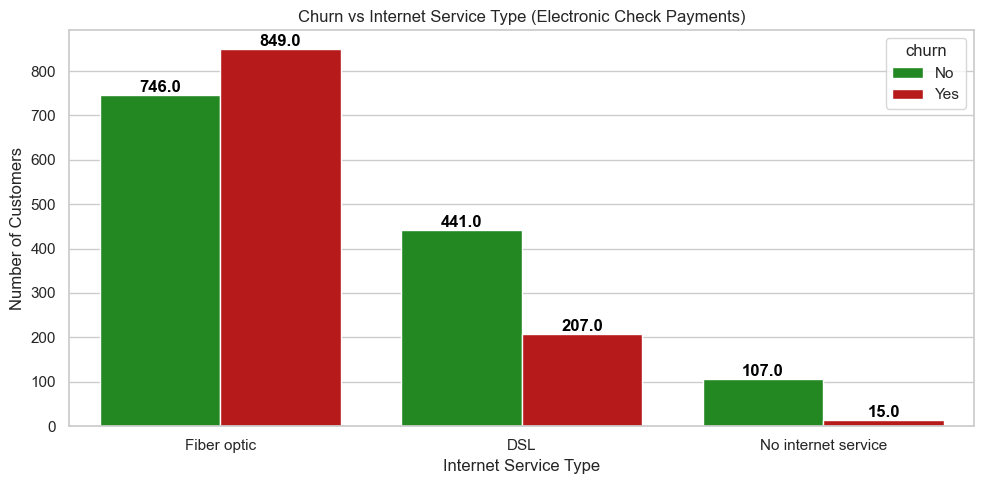

In [51]:
def plot_churn_vs_internet_service(df):
    # Filter the DataFrame for customers paying with electronic check
    df_electronic_check = df[df['payment_method'] == 'Electronic check']
    
    sns.set(style="whitegrid")
    plt.figure(figsize=(10, 5))
    
    # Create a countplot for internet service types and churn rates
    ax = sns.countplot(x='internet_service_type', hue='churn', data=df_electronic_check,
                       palette=["#149911", "#D00000"],
                       order=['Fiber optic', 'DSL', 'No internet service'], hue_order=['No', 'Yes'])

    plt.title("Churn vs Internet Service Type (Electronic Check Payments)")
    plt.xlabel("Internet Service Type")
    plt.ylabel("Number of Customers")

    plt.xticks(rotation=0)
    
    # Annotate the bars with the values
    for p in ax.patches:
        ax.annotate(f"{p.get_height()}", xy=(p.get_x() + p.get_width() / 2, p.get_height()),
                    xytext=(0, 0), textcoords="offset points", ha='center', va='bottom', color='black', weight='bold')

    plt.tight_layout()
    plt.show()

plot_churn_vs_internet_service(df)


In [55]:
def plot_churn_vs_internet_service_payment(df):
    # Filter the DataFrame for customers with payment methods other than 'Electronic check'
    df_non_electronic_check = df[df['payment_method'] != 'Electronic check']
    
    # Create a DataFrame for churned and unchurned customers
    df_churned = df_non_electronic_check[df_non_electronic_check['churn'] == 'Yes']
    df_unchurned = df_non_electronic_check[df_non_electronic_check['churn'] == 'No']
    
    # Combine the churned and unchurned counts for each internet service type
    churned_counts = df_churned['internet_service_type'].value_counts().reindex(['DSL', 'Fiber optic', 'No internet service'], fill_value=0)
    unchurned_counts = df_unchurned['internet_service_type'].value_counts().reindex(['DSL', 'Fiber optic', 'No internet service'], fill_value=0)
    e_check_counts = pd.DataFrame({'Churned': churned_counts, 'Unchurned': unchurned_counts})
    # Chart settings
    sns.set(style="whitegrid")
    plt.figure(figsize=(10, 5))
    
    # Create a bar plot for churned and unchurned customers and internet service types
    
        # Create a bar plot for payment methods and churn rates
    ax = sns.countplot(x='internet_service_type', hue='churn', data=e_check_counts, palette=["#149911", "#D00000"], order=['Fiber optic', 'DSL', 'No internet service'], hue_order=['No', 'Yes'])


    plt.title("Churn vs Internet Service Type (Non-Electronic Check Payments)")
    plt.xlabel("Internet Service Type")
    plt.ylabel("Number of Customers")

    plt.xticks(rotation=0)
    
    # Annotate the bars with the values
    for p in ax.patches:
        ax.annotate(f"{p.get_height()}", xy=(p.get_x() + p.get_width() / 2, p.get_height()),
                    xytext=(0, 0), textcoords="offset points", ha='center', va='bottom', color='black', weight='bold')

    plt.tight_layout()
    plt.show()

# Call the function with the provided DataFrame
plot_churn_vs_internet_service_payment(df)


ValueError: Could not interpret input 'internet_service_type'

<Figure size 1000x500 with 0 Axes>

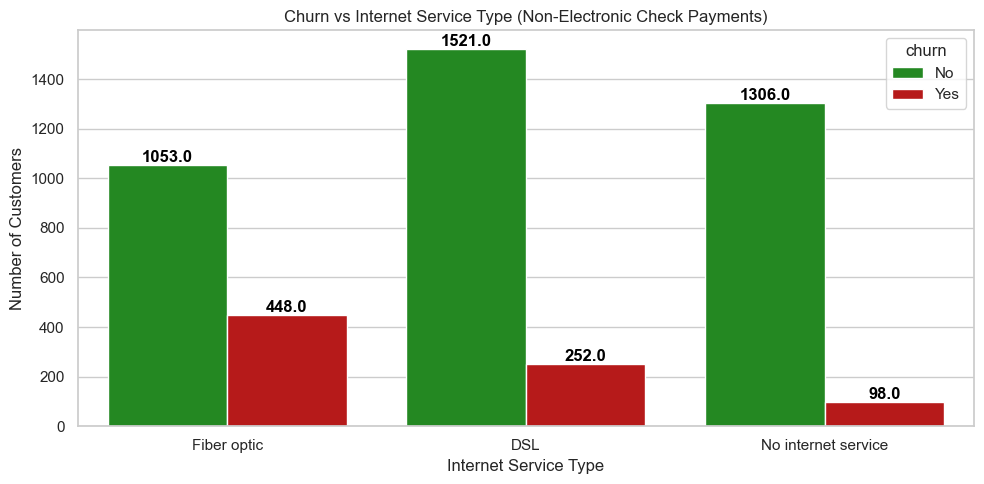

In [49]:
def plot_churn_vs_internet_service_payment(df):
    # Filter the DataFrame for customers with payment methods other than 'Electronic check'
    df_non_electronic_check = df[df['payment_method'] != 'Electronic check']
    
    # Chart settings
    sns.set(style="whitegrid")
    plt.figure(figsize=(10, 5))
    
    # Create a countplot for internet service types and churn rates
    ax = sns.countplot(x='internet_service_type', hue='churn', data=df_non_electronic_check,
                       palette=["#149911", "#D00000"],
                       order=['Fiber optic', 'DSL', 'No internet service'], hue_order=['No', 'Yes'])

    plt.title("Churn vs Internet Service Type (Non-Electronic Check Payments)")
    plt.xlabel("Internet Service Type")
    plt.ylabel("Number of Customers")

    plt.xticks(rotation=0)
    
    # Annotate the bars with the values
    for p in ax.patches:
        ax.annotate(f"{p.get_height()}", xy=(p.get_x() + p.get_width() / 2, p.get_height()),
                    xytext=(0, 0), textcoords="offset points", ha='center', va='bottom', color='black', weight='bold')

    plt.tight_layout()
    plt.show()

# Call the function with the provided DataFrame
plot_churn_vs_internet_service_payment(df)


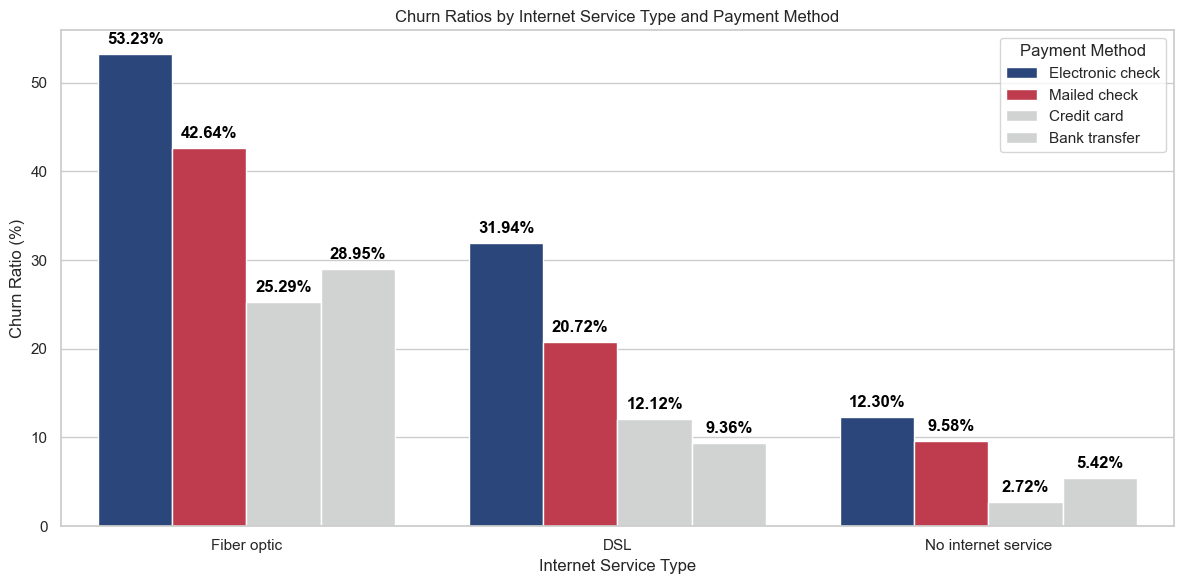

In [72]:
def plot_churn_vs_internet_service_payment(df):
    # Filter the DataFrame for customers with payment methods other than 'Electronic check'
    df_non_electronic_check = df
    
    # Calculate churn ratios for each internet service type and payment method
    churn_ratios = []
    service_types = ['Fiber optic', 'DSL', 'No internet service']
    payment_methods = df_non_electronic_check['payment_method'].unique()
    
    for service_type in service_types:
        for payment_method in payment_methods:
            df_filtered = df_non_electronic_check[(df_non_electronic_check['internet_service_type'] == service_type) &
                                                 (df_non_electronic_check['payment_method'] == payment_method)]
            
            total_customers = len(df_filtered)
            churned_customers = len(df_filtered[df_filtered['churn'] == 'Yes'])
            
            churn_ratio = (churned_customers / total_customers) * 100 if total_customers > 0 else 0
            churn_ratios.append(churn_ratio)
    
    # Create a DataFrame to store the churn ratios
    churn_df = pd.DataFrame({'Internet Service Type': [service_type for service_type in service_types for _ in payment_methods],
                             'Payment Method': [payment_method for _ in service_types for payment_method in payment_methods],
                             'Churn Ratio': churn_ratios})
    
    # Chart settings
    sns.set(style="whitegrid")
    plt.figure(figsize=(12, 6))
    
    # Create a bar plot for churn ratios by internet service type and payment method
    ax = sns.barplot(x='Internet Service Type', y='Churn Ratio', hue='Payment Method', data=churn_df,
                     hue_order= ['Electronic check', 'Mailed check', 'Credit card', 'Bank transfer'],
                     palette=["#1d4289", "#d3273e", "#d0d3d4", "#d0d3d4"])
    
    plt.title("Churn Ratios by Internet Service Type and Payment Method")
    plt.xlabel("Internet Service Type")
    plt.ylabel("Churn Ratio (%)")
    plt.legend(title="Payment Method")

    plt.xticks(rotation=0)
    
    # Annotate the bars with the churn ratios
    for p in ax.patches:
        ax.annotate(f"{p.get_height():.2f}%", xy=(p.get_x() + p.get_width() / 2, p.get_height()),
                    xytext=(0, 5), textcoords="offset points", ha='center', va='bottom', color='black', weight='bold')

    plt.tight_layout()
    plt.show()

# Call the function with the provided DataFrame
plot_churn_vs_internet_service_payment(df)


AttributeError: 'Rectangle' object has no attribute 'get_hue'

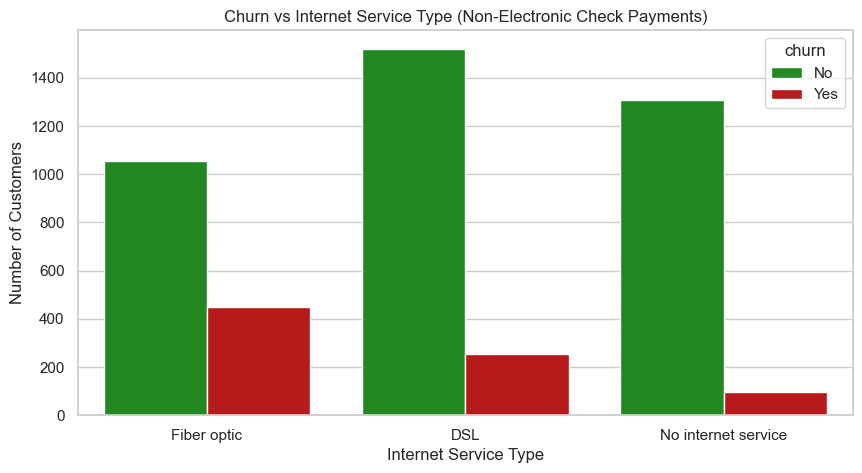

In [63]:
def plot_churn_vs_internet_service_payment(df):
    # Filter the DataFrame for customers with payment methods other than 'Electronic check'
    df_non_electronic_check = df[df['payment_method'] != 'Electronic check']
    
    # Calculate churn ratios for each internet service type and churn
    churn_ratios = {}
    internet_service_types = ['Fiber optic', 'DSL', 'No internet service']
    for service_type in internet_service_types:
        churned_count = df_non_electronic_check[(df_non_electronic_check['internet_service_type'] == service_type) &
                                               (df_non_electronic_check['churn'] == 'Yes')].shape[0]
        total_count = df_non_electronic_check[df_non_electronic_check['internet_service_type'] == service_type].shape[0]
        churn_ratio = (churned_count / total_count) * 100 if total_count != 0 else 0
        churn_ratios[service_type] = churn_ratio
    
    # Chart settings
    sns.set(style="whitegrid")
    plt.figure(figsize=(10, 5))
    
    # Create a countplot for internet service types and churn rates
    ax = sns.countplot(x='internet_service_type', hue='churn', data=df_non_electronic_check,
                       palette=["#149911", "#D00000"],
                       order=['Fiber optic', 'DSL', 'No internet service'], hue_order=['No', 'Yes'])

    plt.title("Churn vs Internet Service Type (Non-Electronic Check Payments)")
    plt.xlabel("Internet Service Type")
    plt.ylabel("Number of Customers")

    plt.xticks(rotation=0)
    
    # Annotate the bars with the churn ratios
    for service_type in internet_service_types:
        for churn_status in ['No', 'Yes']:
            total_height = sum([p.get_height() for p in ax.patches if p.get_x() == ax.patches[0].get_x()])
            for p in ax.patches:
                if p.get_x() == ax.patches[0].get_x() and p.get_hue() == churn_status:
                    ax.annotate(f"{churn_ratios[service_type]:.2f}%", xy=(p.get_x() + p.get_width() / 2, p.get_height()),
                                xytext=(0, 5), textcoords="offset points", ha='center', va='bottom', color='black', weight='bold')
    
    # Set the order of the payment methods for the hue
    hue_order = ['Electronic check', 'Mailed check', 'Credit card', 'Bank transfer']
    ax.legend(title="Churn", loc='upper right', labels=hue_order)
    
    plt.tight_layout()
    plt.show()

# Call the function with the provided DataFrame
plot_churn_vs_internet_service_payment(df)


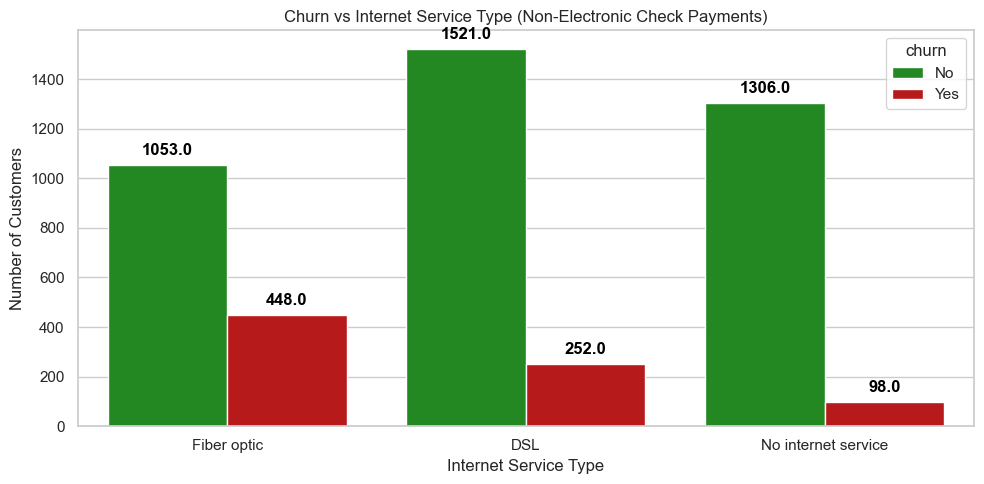

In [68]:
def plot_churn_vs_internet_service_payment(df):
    # Filter the DataFrame for customers with payment methods other than 'Electronic check'
    df_non_electronic_check = df[df['payment_method'] != 'Electronic check']
    
    # Chart settings
    sns.set(style="whitegrid")
    plt.figure(figsize=(10, 5))
    
    # Create a countplot for internet service types and churn rates
    ax = sns.countplot(x='internet_service_type', hue='churn', data=df_non_electronic_check,
                       palette=["#149911", "#D00000"],
                       order=['Fiber optic', 'DSL', 'No internet service'], hue_order=['No', 'Yes'])

    plt.title("Churn vs Internet Service Type (Non-Electronic Check Payments)")
    plt.xlabel("Internet Service Type")
    plt.ylabel("Number of Customers")

    plt.xticks(rotation=0)
    
    # Annotate the bars with the values
    for p in ax.patches:
        ax.annotate(f"{p.get_height()}", xy=(p.get_x() + p.get_width() / 2, p.get_height()),
                    xytext=(0, 5), textcoords="offset points", ha='center', va='bottom', color='black', weight='bold')

    plt.tight_layout()
    plt.show()

# Call the function with the provided DataFrame
plot_churn_vs_internet_service_payment(df)


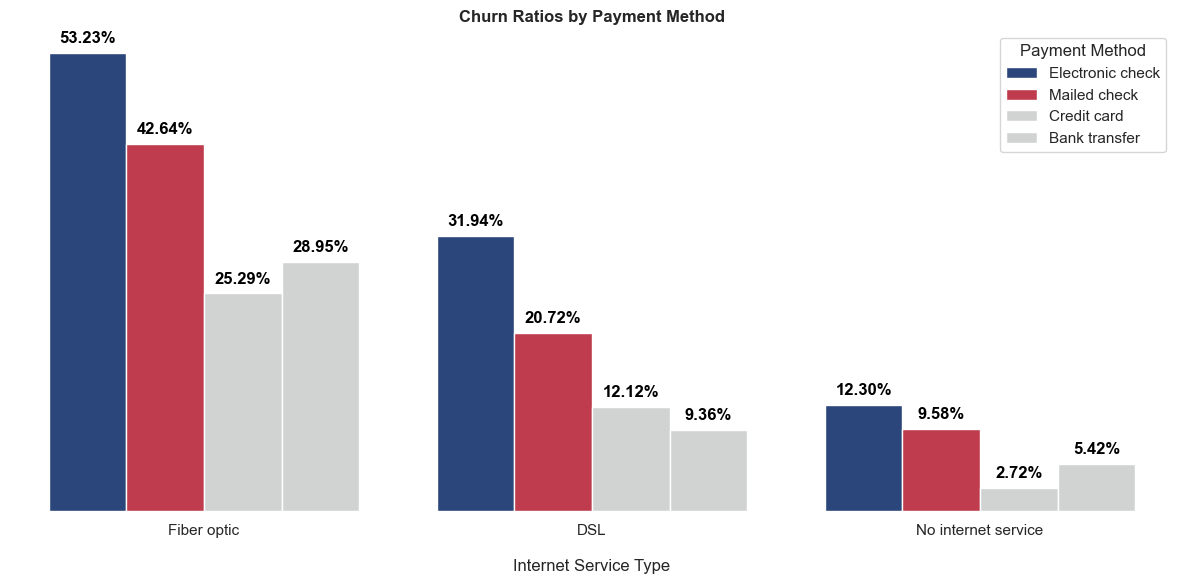

In [81]:
def plot_churn_vs_internet_service_payment(df):
    # Filter the DataFrame for customers with payment methods other than 'Electronic check'
    df_non_electronic_check = df
    
    # Define the desired order of internet service types
    service_types = ['Fiber optic', 'DSL', 'No internet service']
    
    # Calculate churn ratios for each internet service type and payment method
    churn_ratios = []
    payment_methods = df_non_electronic_check['payment_method'].unique()
    
    for service_type in service_types:
        for payment_method in payment_methods:
            df_filtered = df_non_electronic_check[(df_non_electronic_check['internet_service_type'] == service_type) &
                                                 (df_non_electronic_check['payment_method'] == payment_method)]
            
            total_customers = len(df_filtered)
            churned_customers = len(df_filtered[df_filtered['churn'] == 'Yes'])
            
            churn_ratio = (churned_customers / total_customers) * 100 if total_customers > 0 else 0
            churn_ratios.append(churn_ratio)
    
    # Create a DataFrame to store the churn ratios
    churn_df = pd.DataFrame({'Internet Service Type': [service_type for service_type in service_types for _ in payment_methods],
                             'Payment Method': [payment_method for _ in service_types for payment_method in payment_methods],
                             'Churn Ratio': churn_ratios})
    
    # Chart settings
    sns.set(style="whitegrid")
    plt.figure(figsize=(12, 6))
    
    # Create a bar plot for churn ratios by internet service type and payment method
    ax = sns.barplot(x='Internet Service Type', y='Churn Ratio', hue='Payment Method', data=churn_df,
                     hue_order= ['Electronic check', 'Mailed check', 'Credit card', 'Bank transfer'],
                     palette=["#1d4289", "#d3273e", "#d0d3d4", "#d0d3d4"])
    
    plt.title("Churn Ratios by Payment Method", weight='bold')
    plt.xlabel("Internet Service Type", labelpad=15)
    # plt.ylabel("Churn Ratio (%)")
    plt.ylabel("")
    plt.legend(title="Payment Method")

    plt.xticks(rotation=0)

     # Remove y-axis ticks and the border around the plot
    ax.set_yticks([])
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    
    # Annotate the bars with the churn ratios
    for p in ax.patches:
        ax.annotate(f"{p.get_height():.2f}%", xy=(p.get_x() + p.get_width() / 2, p.get_height()),
                    xytext=(0, 5), textcoords="offset points", ha='center', va='bottom', color='black', weight='bold')

    plt.tight_layout()
    plt.show()

# Call the function with the provided DataFrame
plot_churn_vs_internet_service_payment(df)


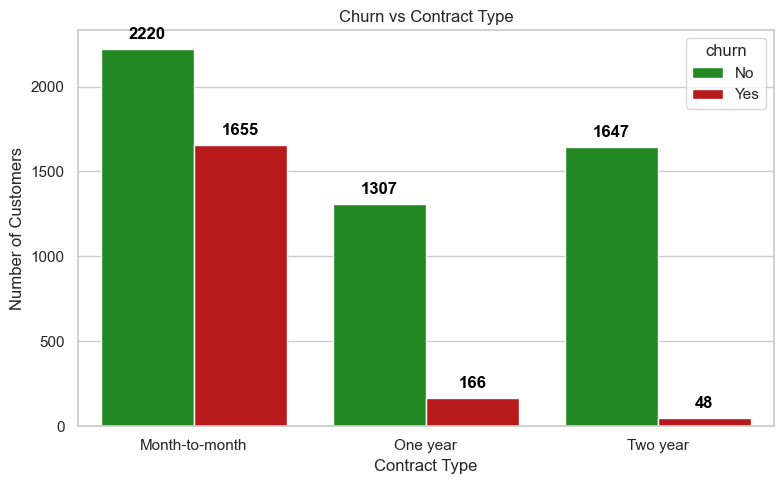

In [82]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_churn_vs_contract_type(df):
    # Chart settings
    sns.set(style="whitegrid")
    plt.figure(figsize=(8, 5))
    
    # Create a countplot for contract types and churn rates
    ax = sns.countplot(x='contract_type', hue='churn', data=df,
                       palette=["#149911", "#D00000"],
                       hue_order=['No', 'Yes'],
                       order=['Month-to-month', 'One year', 'Two year'])

    plt.title("Churn vs Contract Type")
    plt.xlabel("Contract Type")
    plt.ylabel("Number of Customers")

    plt.xticks(rotation=0)
    
    # Annotate the bars with the values
    for p in ax.patches:
        ax.annotate(f"{int(p.get_height())}", xy=(p.get_x() + p.get_width() / 2, p.get_height()),
                    xytext=(0, 5), textcoords="offset points", ha='center', va='bottom', color='black', weight='bold')

    plt.tight_layout()
    plt.show()

# Call the function with the provided DataFrame
plot_churn_vs_contract_type(df)


<font size="4">Churn ratio percentage is 18% higher on customers with Electronic check.</font><br>

<font size="5">Hypothesis</font>

Null Hypothesis (H<sub>0</sub>): The payment method does not have any significant effect on customer churn.<br>
Alternative Hypothesis (H<sub>a</sub>): The payment method has a significant effect on customer churn. 

We use a chi-squared test for independence to examine the relationship between Churn and Payment Method.

Chi-Square Test
* Confidance interval of 95%
* Alpha .05

In [ ]:
# Perform Chi-Test
chi2_payment_method(df)

Chi-Squared Value: 648.1423274814
P-value: 0.0000
There is a significant association between payment method and churn.


<font size="5">We have strong evidence to reject the null hypothesis</font>

P value is near 0. Therefore we have evidende so support that churn and Payment Method are related. Based on this and the large difference in distribution, using internet service featrue in modeling will likely have a large positive impact on the model's accuracy. 

<font size="5">Does Tenure have an affect on churn?</font>

We will compare the churn rates vs Tenure.

Tenure: In months

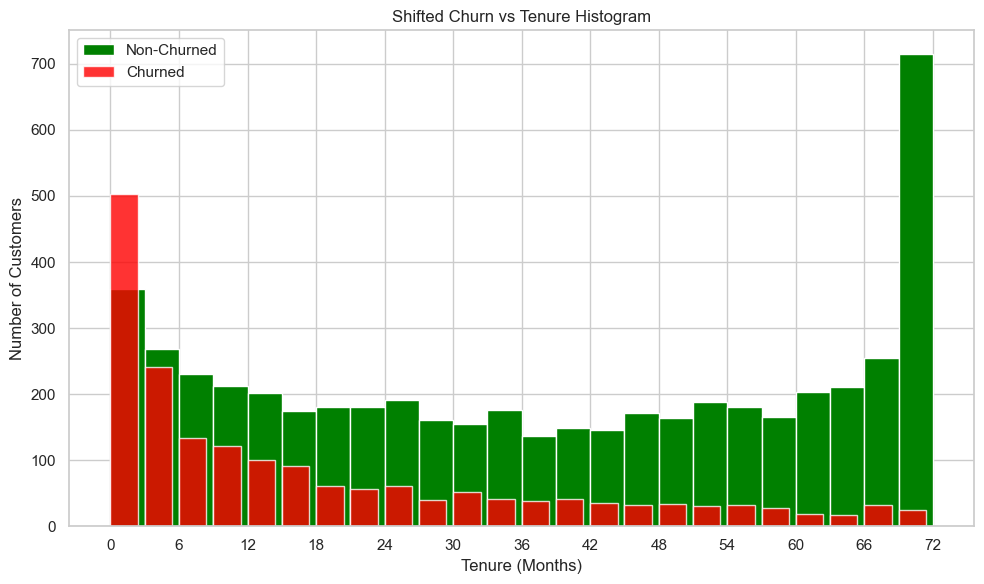

In [ ]:
# Display Churn vs Tenure
plot_churn_vs_tenure_histogram(df)

<font size="4">The histogram seems to suggest that churn decreases as tenure increses</font><br>

<font size="5">Hypothesis</font>

Null Hypothesis (H<sub>0</sub>): There is no significant relationship between tenure and churn.
<br>
Alternative Hypothesis (H<sub>a</sub>): There is a significant relationship between tenure and churn.

Lets use the T-Test to determine whether the difference in mean tenure is statistically significant.

T-Test
* Confidance interval of 95%
* Alpha .05

In [ ]:
# Perform T-Test
ttest_churn_vs_tenure(df)

T-Statistic: -31.579550511353766
P-Value: 0.0000

There is a significant relationship between tenure and churn.


<font size="5">We have strong evidence to reject the null hypothesis.</font>

P value is near 0. which indicates a highly statistically significant relationship between tenure and churn. Incorporating the tenure feature in modeling is expected to  have a large positive impact on the accuracy.

<font size="5">Does Monthy Charges have an affect on churn?</font>

We will compare the churn rates vs Monthly Charges.

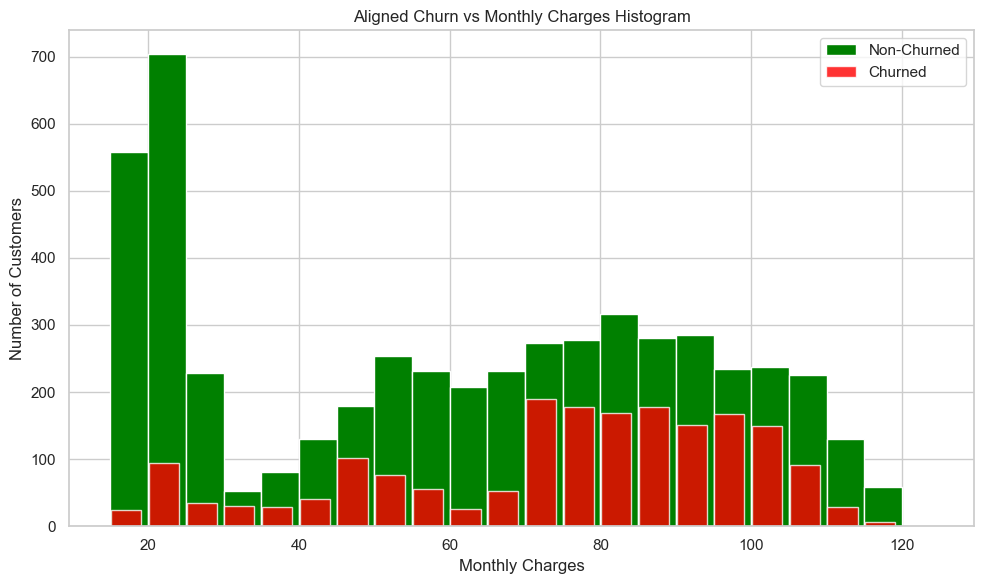

In [ ]:
# Display Churn vs Monthly Charges
plot_churn_vs_monthly_charges_histogram(df)

<font size="4">The histogram suggest that as monthly charges increase, churn increases.</font><br>

<font size="5">Hypothesis</font>

Null Hypothesis (H<sub>0</sub>): There is no significant correlation between higher monthly charges and churned customers.
<br>
Alternative Hypothesis (H<sub>a</sub>):  There is a significant positive correlation between higher monthly charges and churned customers.

Lets use the T-Test to determine whether the difference in mean tenure is statistically significant.

T-Test
* Confidance interval of 95%
* Alpha .05

In [ ]:
# Perform T-Test
ttest_monthly_charges(df)

One-tailed t-test results:
T-statistic: 16.536738015936308
P-value: 1.3533228034442077e-60
There is a significant relationship between monthly charges and churn.


<font size="5">We have strong evidence to reject the null hypothesis.</font>

P value is near 0. which indicates a highly statistically significant relationship between monthly charges and churn. Incorporating the monthly charges feature in modeling is expected to  have a large positive impact on the accuracy.

<font size="5">Exploration Summary</font>

* A chi-squared test indicated a significant relationship between internet type and churn
* A chi-squared test indicated a significant relationship between payment method and churn
* A T-Test indicated a significant relationship between tenure and churn
* A T-Test indicated a significant relationship between monthly charges and churn

<font size="5">Features I am moving to modeling With</font>


* Internet Type
* Payment Method
* Tenure
* Monthly Charges

<font size="5">Modeling</font>

* I will use accuracy as my evaluation metric
* Unchurned makeup 73% of the data


* by guessing unchurned for every customer one could achieve an accuracy of 73.46% 
* 73.46% will be the baseline accuracy I use for this project
* I will be evaluating models developed using four different model types and various hyperparameter configurations 
* Models will be evaluated on train and validate data 
* The model that performs the best will then be evaluated on test data

In [ ]:
train_X.head()

NameError: name 'train_X' is not defined

In [ ]:
#split data
train_X, val_X, test_X, train_y, val_y, test_y = telco_modeling()

<font size="5">Decision Tree</font>

In [ ]:
# Fit and score decicion tree
get_tree(train_X, val_X, train_y, val_y)

Decision Tree Model Accuracy on Training Data: 0.8032454361054767
Decision Tree Model Accuracy on Validation Data: 0.8011363636363636


<font size="4">The Decicion tree model is a slight improvement to baseline</font>

<font size="5">Random Forest</font>

In [ ]:
# Fit and score random forest
get_forest(train_X, val_X, train_y, val_y)

Accuracy of Random Forest on train is 0.8129817444219067
Accuracy of Random Forest on validate is 0.8058712121212122


<font size="4">The Random Forest model is a negligible improvement over the decicion tree model</font>

<font size="5">Logistic Regression</font>

In [ ]:
# Fit and score logistic regression
get_logreg(train_X, val_X, train_y, val_y)

Accuracy of Logistic Regression on train is 0.8016227180527383
Accuracy of Logistic Regression on validate is 0.7945075757575758


<font size="4">The Logistic Regression model is a negligible improvement over baseline and slighly worse than the decicion tree model</font>

<font size="5">KNN</font>

In [ ]:
# Fit and score k-Nearest Neighbors
get_knn(train_X, val_X, train_y, val_y)

Accuracy of K-Nearest Neighbors on train is 0.8121703853955375
Accuracy of K-Nearest Neighbors on validate is 0.803030303030303


<font size="4">The K-Nearest Neighbors model is a negligible improvement over baseline and slighly worse than the decicion tree model</font>

<font size="5">Comparing Models</font>

* Decision Tree, Random Forest, and Logistic Regression and K-Nearest Neighbors models all performed about 6% above baseline. 
* Because the results of the Decision Tree, Random Forest, and Logistic Regression and K-Nearest Neighbors models were all very similar I could proceed to test with any of these models.
* I have chosen to move forward with the Random Forest model as it had a the most accurate validation score at 80.6%

<font size="5">Random Forest on Test Data</font>

In [ ]:
# Fit and score on test data the best model (random forest)
get_forest_test(train_X, test_X, train_y, test_y)

Accuracy of Random Forest on train is 0.8129817444219067
Accuracy of Random Forest on validate is 0.7738883632923368


<font size="5">Modeling Summary</font>

* Decision Tree, Random Forest, and Logistic Regression and K-Nearest Neighbors models all performed about 6% above baseline. 
* Random forest was selected as the final model and had an accuracy of about 77.4% which is only about 4% above the baseline accuracy

<font size="5">Conclusions</font>

* Electronic Check has the highest distribution of churned customers at 45%
* Fiber Optic internet has the second highest distribution of churned customers at 41%
* There is a correlation between Tenure and Churn.
* There is a correlation between Monthly Charge and Churn.

<font size="5">Modeling</font>

The final model failed to significantly outperform the baseline. Possible reasons include:

* Not enough features were included in the models

<font size="5">Recomendations</font>

* Encourage customers to use any payment method other than Electronic Check.
* Encourage customers to sign up for a 12 month contract

<font size="5">Next Steps</font>

* Add more features to improve the models